In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
loan_df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/Loan_Amount_Prediction/Cleaned_loan_amount_dataset.csv")

In [18]:
loan_df.head()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,TotalIncome,TotalLiabilities,DebtToIncome,FreeCash,Rating,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan
0,0,0,53,0,2125.0,2125.0,7,3,0.000000,13,7,6.563856,6.214788,3.306520,7.760007,3,0.000000,1000.0,0.693147,6.216606
1,0,1,50,0,3000.0,3000.0,3,0,0.693147,17,7,7.496097,6.608608,3.452524,7.788543,2,0.000000,1000.0,0.693147,7.496097
2,1,0,44,1,10630.0,9100.0,3,0,1.791759,18,5,7.783641,6.820016,3.321793,7.894851,0,0.000000,1000.0,0.000000,0.000000
3,1,3,42,1,1500.0,1500.0,7,1,2.079442,13,4,7.454141,5.863631,2.123458,7.931454,6,1.609438,1000.0,0.000000,0.000000
4,1,0,34,0,1595.0,1090.0,10,3,0.000000,13,9,7.240650,6.854355,3.611998,7.795568,7,1.945910,1000.0,0.000000,0.000000


In [19]:
loan_df.describe()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,TotalIncome,TotalLiabilities,DebtToIncome,FreeCash,Rating,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan
count,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000
mean,0.560170,0.473881,40.389137,0.737434,2699.127966,2543.473023,8.968661,4.225988,0.247288,11.693391,6.636310,7.302133,4.587818,0.617639,7.788139,4.018579,0.096525,969.038413,0.638903,4.344731
std,0.496368,0.767600,12.359547,0.574491,2342.758228,2182.064156,1.364210,1.571991,0.557088,2.424171,2.029641,0.712547,2.546204,1.309155,0.095591,1.780162,0.380086,86.969200,0.723917,4.191922
min,0.000000,0.000000,0.000000,0.000000,10.000000,6.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,740.000000,740.000000,9.000000,5.000000,0.000000,12.000000,5.000000,6.898715,3.948162,0.000000,7.755339,3.000000,0.000000,1000.000000,0.000000,0.000000
50%,1.000000,0.000000,39.000000,1.000000,2125.000000,2125.000000,9.000000,5.000000,0.000000,12.000000,7.000000,7.244942,5.621270,0.000000,7.755339,4.000000,0.000000,1000.000000,0.693147,6.274762
75%,1.000000,1.000000,49.000000,1.000000,4150.000000,3825.000000,9.000000,5.000000,0.000000,12.000000,9.000000,7.696667,6.329605,0.000000,7.755339,5.000000,0.000000,1000.000000,1.098612,8.355615
max,1.000000,4.000000,77.000000,2.000000,10632.000000,10632.000000,16.000000,5.000000,2.079442,19.000000,11.000000,13.827459,16.333207,5.293405,11.989673,7.000000,2.397895,1000.000000,3.332205,11.195183


In [20]:
# Perfroming normalization of data using Robust Scaler.
from sklearn.preprocessing import RobustScaler
X = loan_df.drop('Amount',axis=1)
scaler = RobustScaler()  
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = loan_df[['Amount']] 
y = scaler.fit_transform(y)

In [21]:
import joblib
# Saving the scaler object.
joblib.dump(scaler, 'loan_scaler.pkl')

['loan_scaler.pkl']

In [22]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBOOST

In [23]:
import xgboost as xgb
from xgboost import XGBRegressor

# Training and fitting into the model.
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics to analyse model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.06090985856484182
Mean Squared Error (MSE): 0.04221425206414321
Root Mean Squared Error (RMSE): 0.20546107189475873
R² Score: 0.9141587993697858


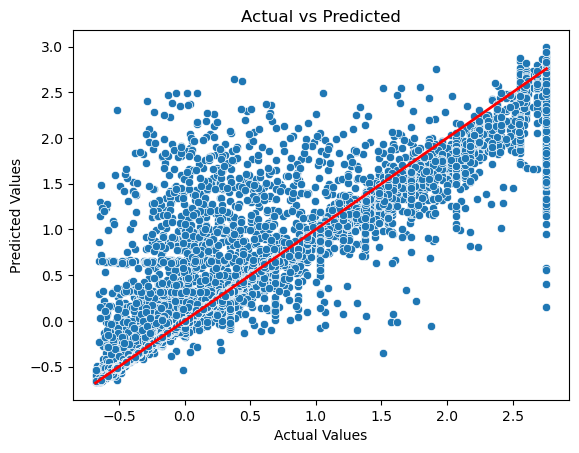

In [25]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()  

# Visualizing the error by plotting actual versus predicted values to see the model's deviation.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Training and fitting the model.
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
# Calculating the metrics for analysing the model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.06238600249178912
Mean Squared Error (MSE): 0.04417766470624147
Root Mean Squared Error (RMSE): 0.21018483462476895
R² Score: 0.9101662686416763


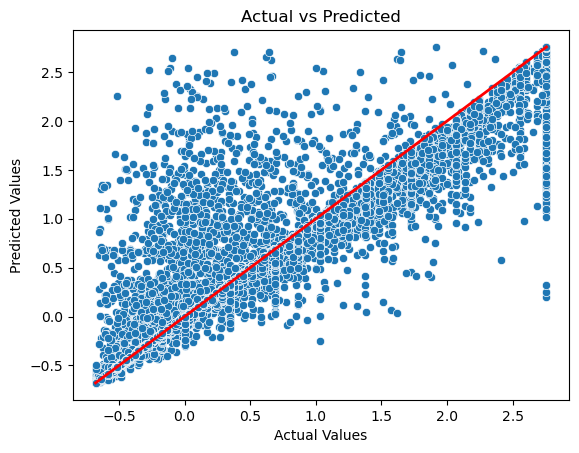

In [28]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()  

# Plotting the actual Vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Training and fitting the model.
gb_reg = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5)
gb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_reg.predict(X_test)

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
# Calculating metrics for analysing model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

In [ ]:
y_test = y_test.ravel()
y_pred = y_pred.ravel() 

# Plotting the scatter plot of actual vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Training and fitting the model.
tree_reg = DecisionTreeRegressor(max_depth=100)
tree_reg.fit(X_train, y_train)

# Performing the predictions.
y_pred = tree_reg.predict(X_test)

In [ ]:
# Calculating metrics of the model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

In [ ]:
y_test = y_test.ravel()
y_pred = y_pred.ravel() 

# Plotting the actual vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# Saving the best performed model which is XGBoost in this case which has the lowet MAE.
import joblib
import zipfile

# Saving the model for future predictions. 
joblib.dump(rf_model, 'loan_model.joblib')

# Converting it into zip to reduce the file size and then saving it.
with zipfile.ZipFile('loan_model.zip', 'w') as zipf:
    zipf.write('loan_model.joblib')